# plot $\langle T\vert Z_{st} \rangle$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from counterflow_file import *

In [4]:
models = ['IEM','IEMHYB','EMST','EMSTHYB']
modeln = ['IEM','IEM-FI','EMST','EMST-FI']
tau_log = np.linspace(-4,-2,21)
tau_log = np.insert( tau_log, 4, -3.65)
Zst = 0.055

In [34]:
params = {}
params['MIX'] = None
params['tres'] = None
params['var'] = 'T'
params['statics'] = 'avg'

In [35]:
file_name = 'cond-CT_eqv-1.csv'
data_raw = pd.read_csv( file_name, index_col=0 )

In [36]:
data = np.empty( [ tau_log.size, len(models) ] )
for j, model in enumerate(models):
    params['MIX'] = model
    for i, t in enumerate(tau_log):
        params['tres'] = t
        
        data_name = params2name( params )
        data[i,j] = np.interp(Zst,
                              data_raw['Z'],
                              data_raw[data_name])

In [37]:
# figure and axes parameters
# total width is fixed, for one column plot
plot_width    = 6.7
margin_left   = 1.3
margin_right  = 0.2
margin_bottom = 1.0
margin_top    = 0.1
space_width   = 3.5
space_height  = 0.5
ftsize        = 7

font = {'family':'serif',
        'weight':'normal',
        'size':ftsize}

# use TEX for interpreter
plt.rc('text',usetex=True)
# use serif font
plt.rc('font',**font)

num_cols = 1
num_rows = 1

colors = ['tab:orange','tab:blue','tab:green','tab:red']

mft = ['o','s']
mfc = ['w',None]

dst = '.'

subplot_width = (plot_width
                -margin_left
                -margin_right
                -(num_cols-1)*space_width)/num_cols
subplot_height = subplot_width * 0.8

plot_height = (num_rows*subplot_height
              +margin_bottom
              +margin_top
              +(num_rows-1)*space_height)

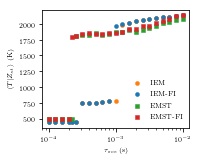

In [38]:
# plot against tmix
fig, ax = plt.subplots(num_rows,num_cols,sharex=True,
                       figsize=cm2inch(plot_width,plot_height))

for j, model in enumerate(modeln):
    ax.plot(
            np.power(10,tau_log),data[:,j],
            c=colors[j],ls='',
            marker=mft[j//2],ms=4,mew=0.5,
            label=model)

# axis limits and ticks
ax.set_xscale('log')

# legend
ax.legend(frameon=False)

# labels
ax.set_xlabel(r'$\tau_{\mathrm{res}}\;(\mathrm{s})$')
ax.set_ylabel(r'$\langle T\vert Z_{st} \rangle\;(\mathrm{K})$')

fig.subplots_adjust(left = margin_left/plot_width,
                    bottom = margin_bottom/plot_height,
                    right = 1.0-margin_right/plot_width,
                    top = 1.0-margin_top/plot_height,
                    wspace = space_width/plot_width,
                    hspace = space_height/plot_height
                    )

In [39]:
fig.savefig('fig_TZst.pdf')